# string model 1 - OR network (no complexes)

In [1]:
import boolean_model_helper as bm
from string_model_builder import string2definition1, add_process_edgelist, add_mtb_edgelist

In [18]:
definition = string2definition('string-network-1.csv', 'True')
definition = add_process_edgelist(definition, 'string-1-process-edgelist.csv', 'True')
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']


1 mtb on/off

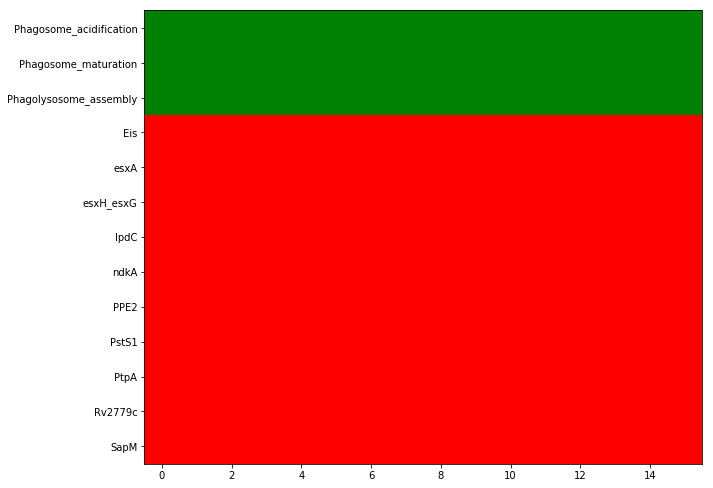

In [10]:
mtb_off = add_mtb_edgelist(definition, 'mtb-edgelist.csv', 'False')
model = bm.run_model(mtb_off)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb)

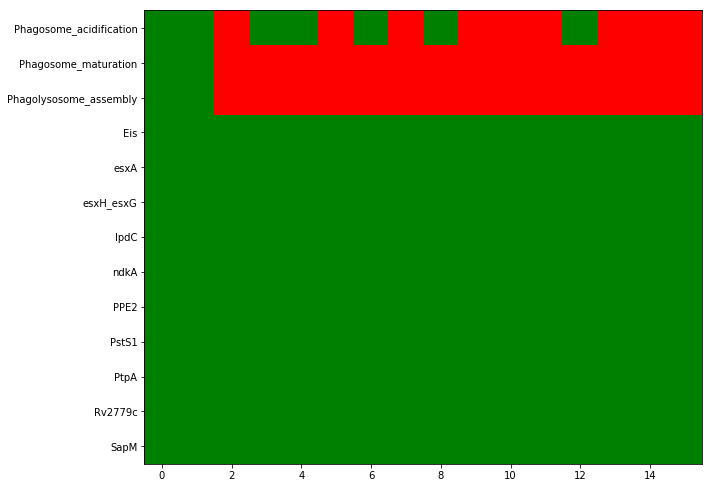

In [11]:
mtb_on = add_mtb_edgelist(definition, 'mtb-edgelist.csv', 'True')
model = bm.run_model(mtb_on)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb)

hit knockout

In [20]:
mtb_off = add_mtb_edgelist(definition, 'mtb-edgelist.csv', 'False')
model = bm.run_model(mtb_off)

hit_nodes = []
for factor in hit:
    if factor in model.nodes:
        hit_nodes.append(factor)
        
hit_nodes

['AP1B1', 'ASPSCR1', 'CHMP2A', 'CLVS2', 'CHMP2B', 'GGA1', 'HIP1R', 'VCP']

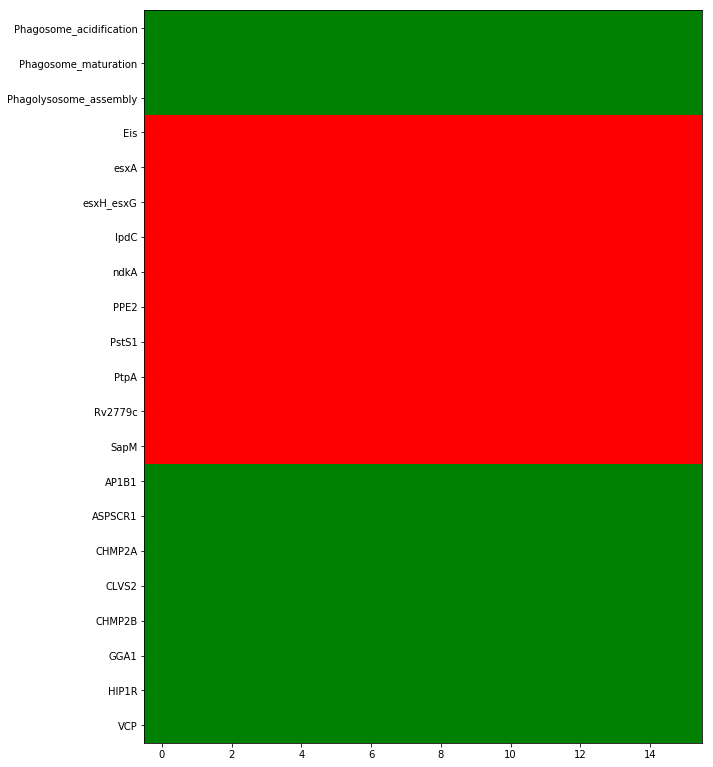

In [21]:
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb + hit_nodes)

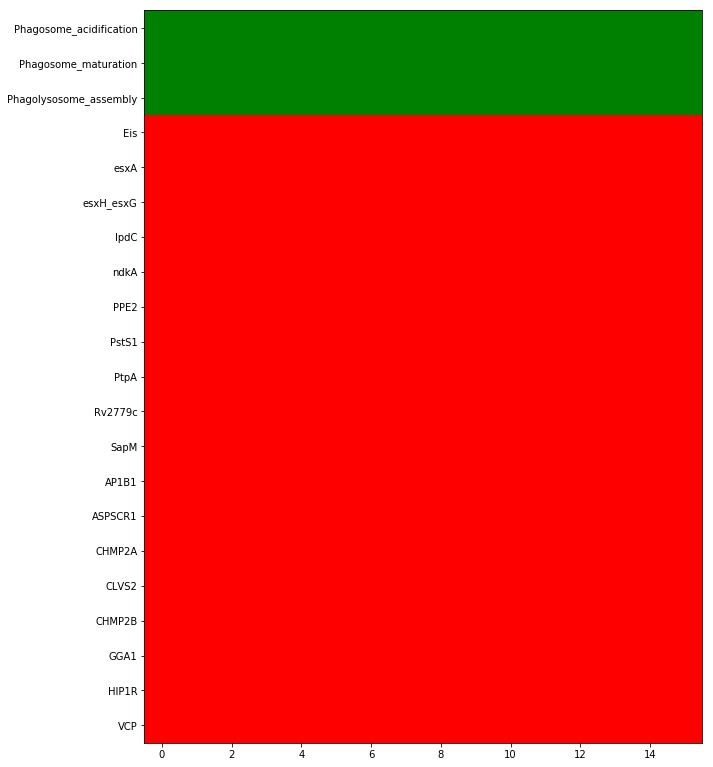

In [22]:
knockout_mtb_off = bm.knockout(mtb_off, hit_nodes)
model = bm.run_model(knockout_mtb_off)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb + hit_nodes)

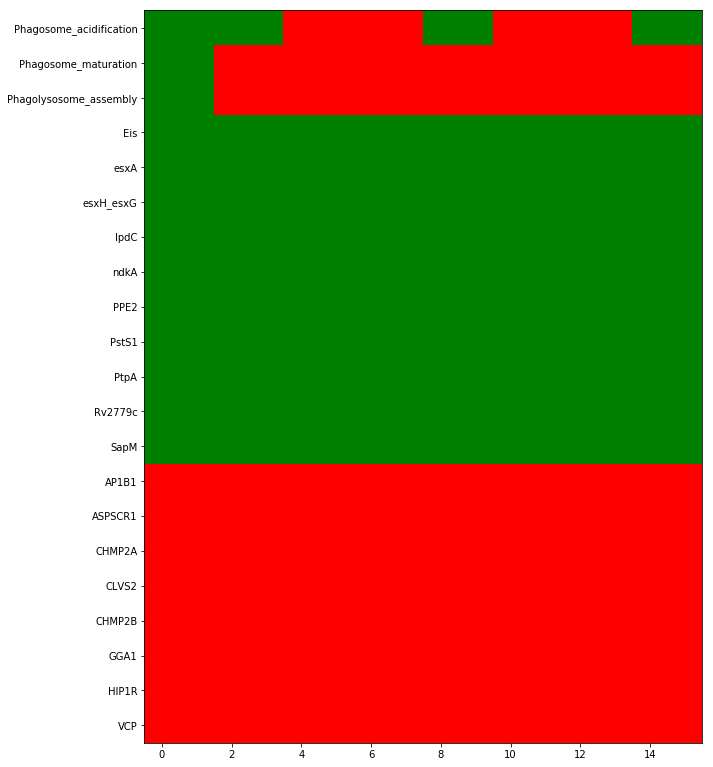

In [23]:
knockout_mtb_on = bm.knockout(mtb_on, hit_nodes)
model = bm.run_model(knockout_mtb_on)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb + hit_nodes)

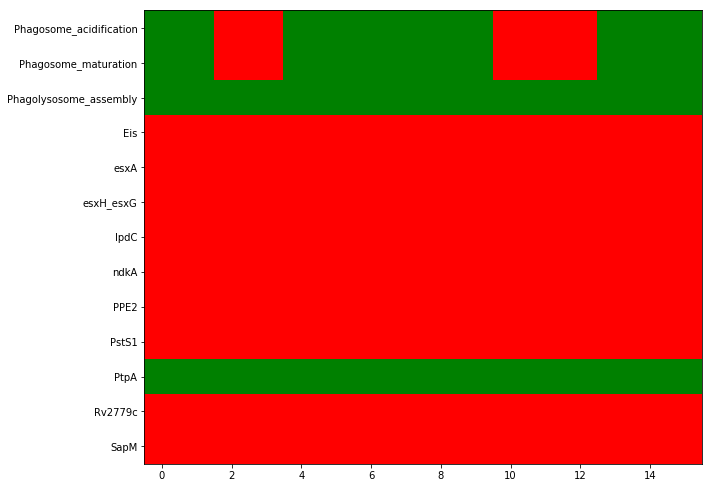

In [29]:
PtpA_on = bm.switch(mtb_off, on=['PtpA'])
model = bm.run_model(PtpA_on)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb)

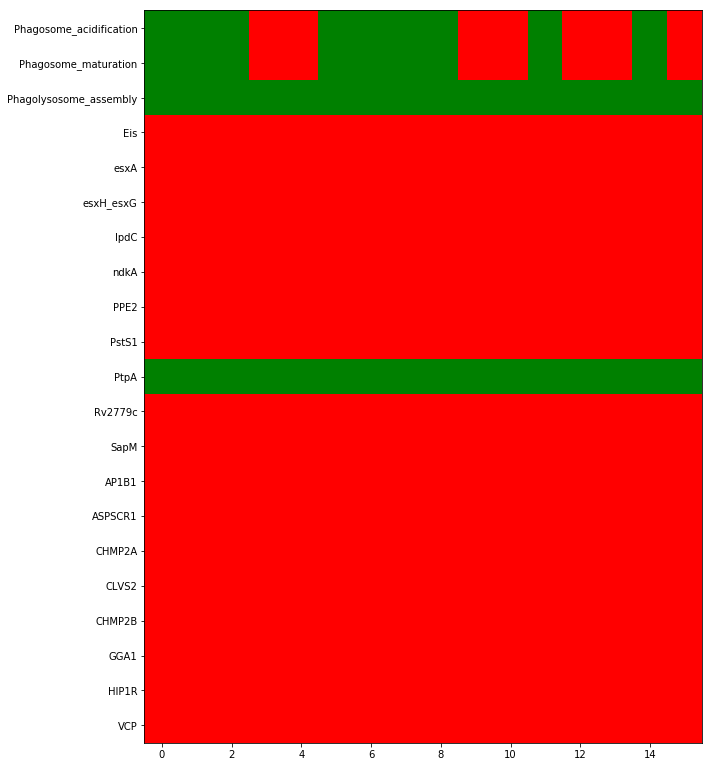

In [30]:
knockout_PtpA_on = bm.knockout(bm.switch(mtb_off, on=['PtpA']), hit_nodes)
model = bm.run_model(knockout_PtpA_on)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb + hit_nodes)